In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

$\textbf{Linear:}$
Usando os dados do Laboratorio de Física III, prática 1, experimento do resistor

In [2]:
data = pd.read_csv("voltagem.csv")
print(data.shape)
data.head()

(10, 2)


,V,I
0,5.0,0.04
1,7.4,0.07
2,8.3,0.08
3,10.1,0.09
4,10.9,0.10


In [3]:
X = data['V'].values
Y = data['I'].values

In [4]:
list_1 = [[1,X[i]] for i in range(len(X))]
#A = []
#A.append(list_1)
#A.append(X)
A_array = np.array(list_1)
Y_array = np.array(Y)
print(A_array)
#print(list_1)
print(Y_array)

[[ 1.   5. ]
 [ 1.   7.4]
 [ 1.   8.3]
 [ 1.  10.1]
 [ 1.  10.9]
 [ 1.  11.4]
 [ 1.  12.4]
 [ 1.  14.9]
 [ 1.  17.5]
 [ 1.  20. ]]
[0.04 0.07 0.08 0.09 0.1  0.11 0.12 0.14 0.17 0.2 ]


In [5]:
A_transpose = np.transpose(A_array)
k = np.dot(A_transpose,A_array)
k_inverse = np.linalg.inv(k)
p = np.dot(k_inverse,A_transpose)
p_vec = np.dot(p,Y_array)
#p_vec = np.dot(Y_array, p)
print(p_vec)

[-0.00991051  0.01034016]


In [6]:
x_fun = np.array(range(-10,100)) 
y_fun =  x_fun*p_vec[1] + p_vec[0]

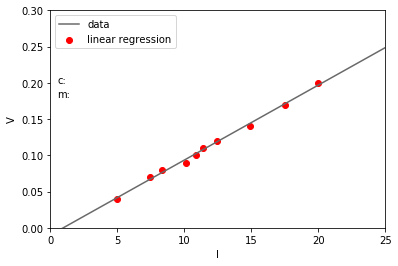

In [7]:
plt.scatter(X,Y_array, color = 'r')
plt.plot(x_fun,y_fun, color = 'dimgrey')
plt.xlabel("I")
plt.ylabel("V")
#plt.label("Corrente X Potencial")
plt.legend(("data","linear regression"),loc = "upper left")
plt.text(0.5, .20, 'c:'% p_vec[0], {'fontsize': 10})
plt.text(0.5, .18, 'm:'% p_vec[1], {'fontsize': 10})
plt.xlim(0,25)
plt.ylim(0,0.3)
plt.show()

$\textbf{Não Linear:}$ experimento do Led vermelho

In [8]:
data = pd.read_csv("led.csv")
data.head()

,Corrente (mA),Voltagem (V)
0,0.000,1.52
1,0.003,1.58
2,0.008,1.63
3,0.016,1.66
4,0.029,1.69


In [22]:
Y = data['Corrente (mA)'].values
X = data['Voltagem (V)'].values

In [33]:
list_1 = [[1,X[i]] for i in range(len(X))]
list_y = [[Y[i]] for i in range(len(X))]
A_array = np.array(list_1)
Y_array = np.array(list_y)
print(A_array)
print(Y_array)

[[1.   1.52]
 [1.   1.58]
 [1.   1.63]
 [1.   1.66]
 [1.   1.69]
 [1.   1.71]
 [1.   1.73]
 [1.   1.75]
 [1.   1.77]
 [1.   1.79]
 [1.   1.82]
 [1.   1.84]
 [1.   1.85]]
[[0.   ]
 [0.003]
 [0.008]
 [0.016]
 [0.029]
 [0.044]
 [0.065]
 [0.1  ]
 [0.157]
 [0.29 ]
 [0.509]
 [0.837]
 [1.14 ]]


In [38]:
A_transpose = np.transpose(A_array)
k = np.dot(A_transpose,A_array)
k_inverse = np.linalg.inv(k)
p = np.dot(k_inverse,A_transpose)
p_vec = np.dot(p,Y_array)
#p_vec = np.dot(Y_array, p)
#print(p)
print(p_vec)
a = np.exp(p_vec[0])
m = p_vec[1]
print("a =", a)
print("m =", m)

[[-4.44362475]
 [ 2.72896695]]
a = [0.01175326]
m = [2.72896695]


In [46]:
x_fun = np.array(range(0,30)) 
y_fun = []
y_fun = (a*(np.exp(x_fun*m)))
#y_fun =  np.log(a*(np.exp(x_fun*m)))

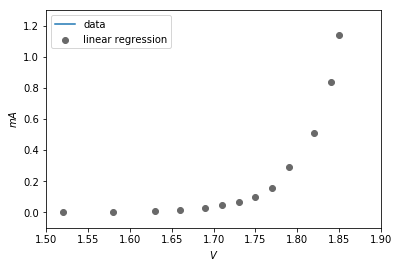

In [48]:
plt.plot(x_fun,y_fun)
plt.scatter(X,Y, color = 'dimgrey')
plt.ylim(-0.1,1.3)
plt.xlim(1.5,1.9)
plt.xlabel("$V$")
plt.ylabel("$mA$")
plt.legend(("data","linear regression"),loc = "upper left")
plt.show()

$\textbf{Surface fitting: }$ 